In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Displaying the data

In [17]:
df =pd.read_csv("house_price.csv")
pd.set_option("display.max_columns",None)
df.head()

,Suburb,HouseID,Rooms,Type,Price,Method,RealEstate_Agent,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,North Melbourne,HN1,2,t,841000.0,S,Jellis,42798,2.3,3051,2.0,1.0,1.0,215.0,2000.0,Melbourne City Council,Northern Metropolitan,6821.0
1,Balwyn North,HN2,5,h,1950000.0,S,RT,42981,9.7,3104,5.0,3.0,2.0,743.0,1949.0,Boroondara City Council,Southern Metropolitan,7809.0
2,Bundoora,HN3,3,h,814000.0,S,Barry,42981,12.1,3083,3.0,1.0,2.0,542.0,1970.0,Banyule City Council,Northern Metropolitan,10175.0
3,Heidelberg Heights,HN4,3,h,NaN,SN,Miles,42981,8.8,3081,3.0,1.0,2.0,658.0,1920.0,Banyule City Council,Eastern Metropolitan,2947.0
4,Roxburgh Park,HN5,4,h,570000.0,S,Raine,42981,20.6,3064,4.0,2.0,2.0,504.0,2000.0,Hume City Council,Northern Metropolitan,5833.0


In [18]:
## Shape of the data 
df.shape

(32851, 18)

In [19]:
## get information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32851 entries, 0 to 32850
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Suburb            32851 non-null  object 
 1   HouseID           32851 non-null  object 
 2   Rooms             32851 non-null  int64  
 3   Type              32851 non-null  object 
 4   Price             25647 non-null  float64
 5   Method            32851 non-null  object 
 6   RealEstate_Agent  32851 non-null  object 
 7   Date              32851 non-null  int64  
 8   Distance          32851 non-null  float64
 9   Postcode          32851 non-null  int64  
 10  Bedroom2          24825 non-null  float64
 11  Bathroom          24816 non-null  float64
 12  Car               24332 non-null  float64
 13  Landsize          21417 non-null  float64
 14  YearBuilt         14092 non-null  float64
 15  CouncilArea       32849 non-null  object 
 16  Regionname        32849 non-null  object

In [20]:
## missing value checking  
obj=df.isnull().sum()
for key, value in obj.iteritems():
    print(key,",",value)

Suburb , 0
HouseID , 0
Rooms , 0
Type , 0
Price , 7204
Method , 0
RealEstate_Agent , 0
Date , 0
Distance , 0
Postcode , 0
Bedroom2 , 8026
Bathroom , 8035
Car , 8519
Landsize , 11434
YearBuilt , 18759
CouncilArea , 2
Regionname , 2
Propertycount , 2


In [21]:
## seperating the numerical features
numerical_features=[feature for feature in df.columns
                   if df[feature].dtypes!= "O"]
numerical_features

['Rooms',
 'Price',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'Propertycount']

In [22]:
## seperating the categorical features 
categorical_features=[feature for feature in df.columns
                     if df[feature].dtypes=="O"]
categorical_features

['Suburb',
 'HouseID',
 'Type',
 'Method',
 'RealEstate_Agent',
 'CouncilArea',
 'Regionname']

In [23]:
## Building the function of missing values for numerical 
def impute_nan_nu(df,feature,median):
    df[feature]=df[feature].fillna(median)

In [24]:
for feature in numerical_features:
    median=df[feature].median()
    impute_nan_nu(df,feature,median)

In [25]:
## Building the funcction of missing values for Categorical
def impute_nan_cat(df,feature,mode):
    df[feature]=df[feature].fillna(mode)

In [26]:
for feature in categorical_features:
    mode=df[feature].mode()[0]
    impute_nan_cat(df,feature,mode)


In [27]:
## Now check the dataset for missing values 
obj=df.isnull().sum()
for key, value in obj.iteritems():
    print(key,",",value)

Suburb , 0
HouseID , 0
Rooms , 0
Type , 0
Price , 0
Method , 0
RealEstate_Agent , 0
Date , 0
Distance , 0
Postcode , 0
Bedroom2 , 0
Bathroom , 0
Car , 0
Landsize , 0
YearBuilt , 0
CouncilArea , 0
Regionname , 0
Propertycount , 0


In [28]:
df.head()

,Suburb,HouseID,Rooms,Type,Price,Method,RealEstate_Agent,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,North Melbourne,HN1,2,t,841000.0,S,Jellis,42798,2.3,3051,2.0,1.0,1.0,215.0,2000.0,Melbourne City Council,Northern Metropolitan,6821.0
1,Balwyn North,HN2,5,h,1950000.0,S,RT,42981,9.7,3104,5.0,3.0,2.0,743.0,1949.0,Boroondara City Council,Southern Metropolitan,7809.0
2,Bundoora,HN3,3,h,814000.0,S,Barry,42981,12.1,3083,3.0,1.0,2.0,542.0,1970.0,Banyule City Council,Northern Metropolitan,10175.0
3,Heidelberg Heights,HN4,3,h,871000.0,SN,Miles,42981,8.8,3081,3.0,1.0,2.0,658.0,1920.0,Banyule City Council,Eastern Metropolitan,2947.0
4,Roxburgh Park,HN5,4,h,570000.0,S,Raine,42981,20.6,3064,4.0,2.0,2.0,504.0,2000.0,Hume City Council,Northern Metropolitan,5833.0


In [29]:
## Handling year feature 
year_feature=[feature for feature in df.columns
             if "Yr" in feature or "Year" in feature]
year_feature

['YearBuilt']

<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

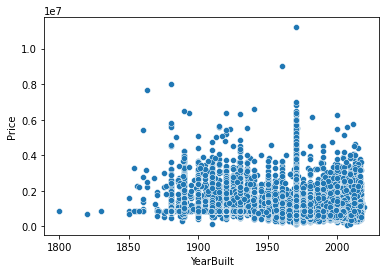

In [30]:
## Exploring the year features 
sns.scatterplot(df["YearBuilt"],df["Price"])

In [31]:
## finding the continious features 
continious_features=[feature for feature in df.columns
                    if df[feature].dtypes!="O" and len(df[feature].unique())>25 and 
                     "Year" not in feature and "Date" not in feature 
                     and "Postcode" not in feature]
continious_features

['Price', 'Distance', 'Landsize', 'Propertycount']

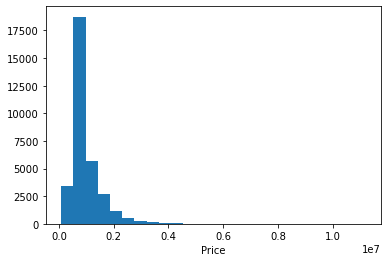

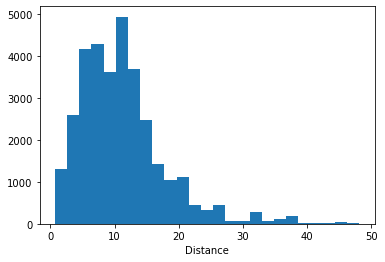

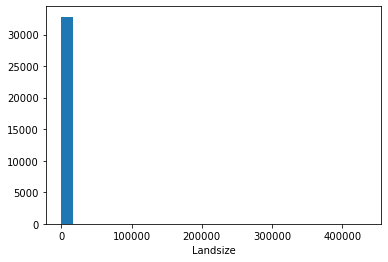

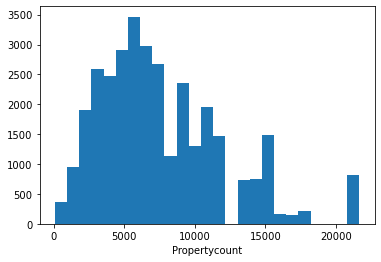

In [32]:
## For distribution 
for feature in continious_features:
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.show()

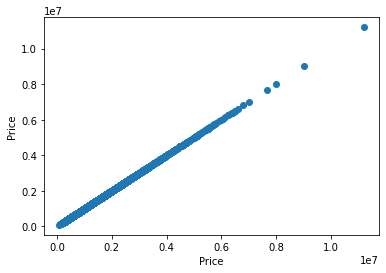

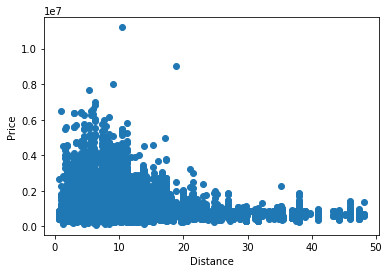

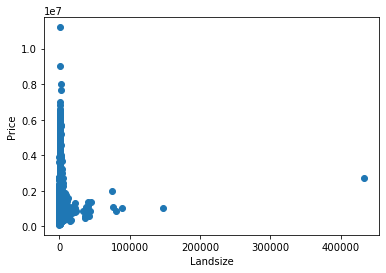

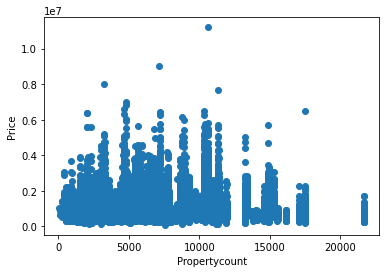

In [33]:
## For scatter plot
for feature in continious_features:
    plt.scatter(df[feature],df["Price"])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

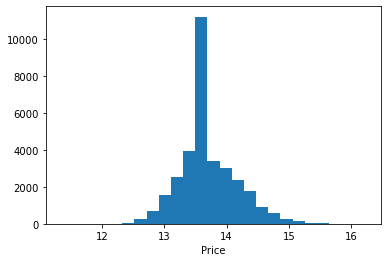

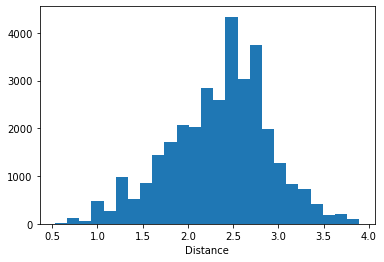

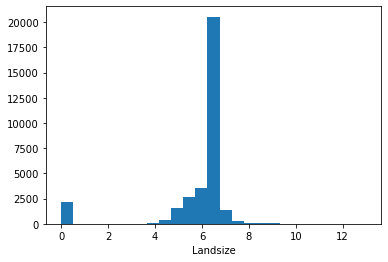

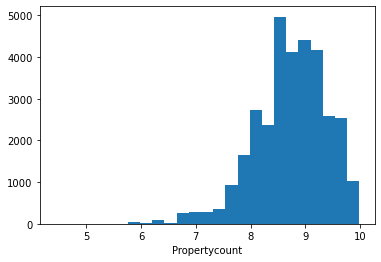

In [34]:
## For normalized the skewed distribution 
for feature in continious_features:
    df[feature]=np.log(df[feature] +1)
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.show()

In [35]:
categorical_features

['Suburb',
 'HouseID',
 'Type',
 'Method',
 'RealEstate_Agent',
 'CouncilArea',
 'Regionname']

In [44]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()

In [45]:
# As the unique values of categorical variables is more so we will go with target encoding
for feature in categorical_features:
    encoder=TargetEncoder(verbose=1,cols=feature)
    df[feature]=encoder.fit_transform(df[feature],df["Price"])

In [46]:
df.head()

,Suburb,HouseID,Rooms,Type,Price,Method,RealEstate_Agent,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,13.607240,13.716622,2,13.670307,13.642348,13.732278,13.906859,42798,1.193922,3051,2.0,1.0,1.0,5.375278,2000.0,13.693466,13.588495,8.827908
1,14.133840,13.716622,5,13.831633,14.483340,13.732278,13.918298,42981,2.370244,3104,5.0,3.0,2.0,6.612041,1949.0,14.010285,13.900667,8.963160
2,13.591685,13.716622,3,13.831633,13.609717,13.732278,13.606449,42981,2.572612,3083,3.0,1.0,2.0,6.297109,1970.0,13.676840,13.588495,9.227787
3,13.547943,13.716622,3,13.831633,13.677398,13.677398,13.760107,42981,2.282382,3081,3.0,1.0,2.0,6.490724,1920.0,13.676840,13.804132,7.988882
4,13.285866,13.716622,4,13.831633,13.253393,13.732278,13.406883,42981,3.072693,3064,4.0,2.0,2.0,6.224558,2000.0,13.322477,13.588495,8.671458


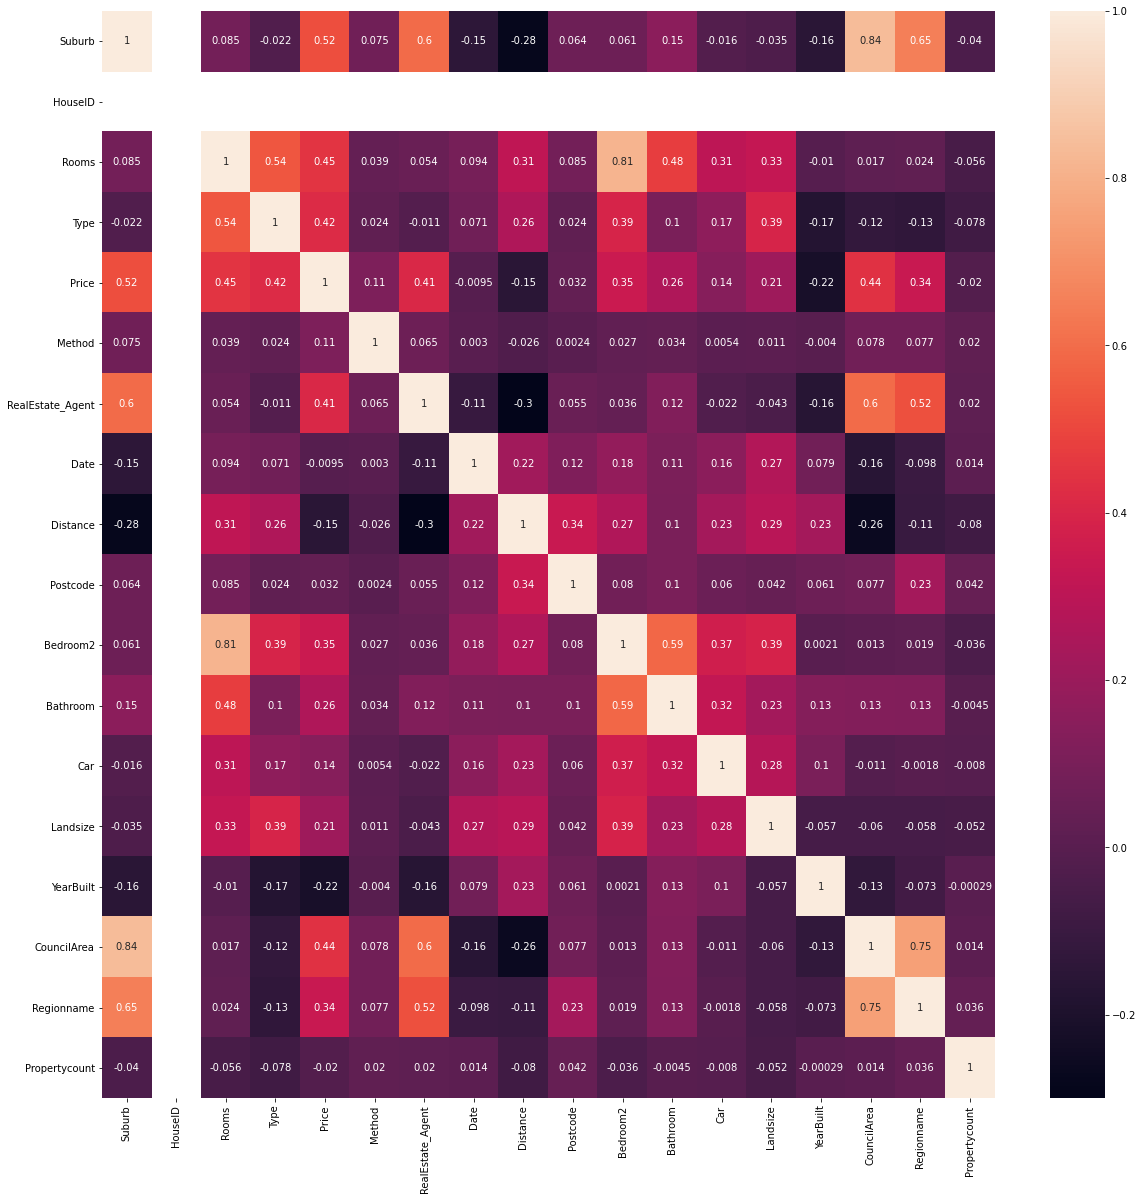

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [64]:
# Creating Independant Variables
X=df.iloc[:,[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17]]
X.head()

,Suburb,Rooms,Type,Method,RealEstate_Agent,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,13.607240,2,13.670307,13.732278,13.906859,42798,1.193922,3051,2.0,1.0,1.0,5.375278,2000.0,13.693466,13.588495,8.827908
1,14.133840,5,13.831633,13.732278,13.918298,42981,2.370244,3104,5.0,3.0,2.0,6.612041,1949.0,14.010285,13.900667,8.963160
2,13.591685,3,13.831633,13.732278,13.606449,42981,2.572612,3083,3.0,1.0,2.0,6.297109,1970.0,13.676840,13.588495,9.227787
3,13.547943,3,13.831633,13.677398,13.760107,42981,2.282382,3081,3.0,1.0,2.0,6.490724,1920.0,13.676840,13.804132,7.988882
4,13.285866,4,13.831633,13.732278,13.406883,42981,3.072693,3064,4.0,2.0,2.0,6.224558,2000.0,13.322477,13.588495,8.671458


In [65]:
## Standardised the data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [66]:
X_scaled=scaler.fit_transform(X)

In [67]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [69]:
# Creating Dependant Variable 
y=df["Price"]

In [73]:
## Test Train Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.32,random_state=100)
print("Shape of train data",X_train.shape)
print ("Shape of test data",X_test.shape)

Shape of train data (22338, 16)
Shape of test data (10513, 16)


In [74]:
## Linear Regression 
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [75]:
linear.fit(X_train,y_train)

LinearRegression()

In [76]:
## Prediction
y_predic=linear.predict(X_test)

In [77]:
## Performance check MAE ( as it has outliers) and R2 score 
from sklearn.metrics import r2_score, median_absolute_error

In [80]:
print("The MAE is ",median_absolute_error(y_test,y_predic))

The MAE is  0.1836797801360639


In [82]:
print("The r2 score is ", r2_score(y_test,y_predic))

The r2 score is  0.5635419005412434


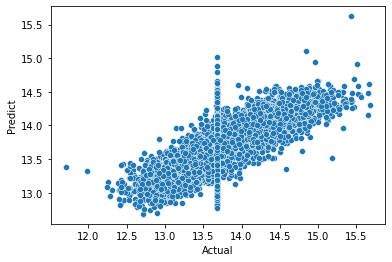

In [84]:
## Visualizied the Predict and Actual Price 
sns.scatterplot(y_test,y_predic)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.show()